<a href="https://colab.research.google.com/github/lyeonsl/2025-Beyond-Summer-Project/blob/main/2025_Beyond_Summer_Project_dataset_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 0. zip 파일 업로드

In [1]:
from google.colab import files
uploaded = files.upload()  # zip 파일 업로드

Saving chair occupied - unoccupied.v1i.yolov5pytorch.zip to chair occupied - unoccupied.v1i.yolov5pytorch.zip


### 1. 압축 해제 및 경로 준비

In [2]:
# 압축 해제
import zipfile
import os

zip_path = "/content/chair occupied - unoccupied.v1i.yolov5pytorch.zip"
extract_path = "/content/chair_dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# data.yaml 경로 확인
yaml_path = os.path.join(extract_path, "data.yaml")
print("data.yaml 위치:", yaml_path)


data.yaml 위치: /content/chair_dataset/data.yaml


### 2. YOLOv8 설치 및 모델 로드

In [3]:
# ultralytics 설치
!pip install ultralytics

# 모델 로드
from ultralytics import YOLO
model = YOLO("yolov8n.pt")  # 경량 모델 (또는 yolov8s.pt 등 가능)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 36.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 68.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 98.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

100%|██████████| 6.25M/6.25M [00:00<00:00, 169MB/s]


### 3. 학습 실행

In [4]:
# 모델 학습 시작
model.train(
    data=yaml_path,        # data.yaml 경로
    epochs=50,
    imgsz=640,
    batch=16,
    name="yolov8_chair"
)

Ultralytics 8.3.165 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/chair_dataset/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8_chair, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0,

100%|██████████| 755k/755k [00:00<00:00, 24.6MB/s]

Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

Model summary: 129 layers, 3,011,433 parameters, 3,011,417 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 137MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 14.4±6.4 MB/s, size: 34.0 KB)


train: Scanning /content/chair_dataset/train/labels... 960 images, 0 backgrounds, 0 corrupt: 100%|██████████| 960/960 [00:00<00:00, 1105.38it/s]

train: /content/chair_dataset/train/images/A60_png_jpg.rf.711cca46646a907c69977776c8144196.jpg: 1 duplicate labels removed
train: New cache created: /content/chair_dataset/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 12.0±8.0 MB/s, size: 32.9 KB)


val: Scanning /content/chair_dataset/valid/labels... 275 images, 0 backgrounds, 0 corrupt: 100%|██████████| 275/275 [00:00<00:00, 686.81it/s]

val: /content/chair_dataset/valid/images/frames2_frame_464_jpg.rf.448c7f7287a35cc84b12feb0e7a736f0.jpg: 1 duplicate labels removed


val: New cache created: /content/chair_dataset/valid/labels.cache
Plotting labels to runs/detect/yolov8_chair/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/yolov8_chair
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.08G      1.321      2.369      1.653         70        640: 100%|██████████| 60/60 [00:19<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.57it/s]

                   all        275        653      0.625      0.349      0.508      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.56G      1.357       1.86      1.669         89        640: 100%|██████████| 60/60 [00:15<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.71it/s]

                   all        275        653      0.464      0.607      0.503      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.58G      1.387      1.758      1.677         75        640: 100%|██████████| 60/60 [00:15<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.81it/s]


                   all        275        653      0.569       0.49       0.52      0.229

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50       2.6G      1.385       1.73      1.689         78        640: 100%|██████████| 60/60 [00:15<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.80it/s]


                   all        275        653      0.644      0.619       0.64       0.32

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.62G      1.382      1.635      1.693         48        640: 100%|██████████| 60/60 [00:16<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.72it/s]


                   all        275        653      0.641      0.558      0.645      0.341

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.63G      1.361      1.569       1.66         45        640: 100%|██████████| 60/60 [00:15<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.58it/s]


                   all        275        653      0.677      0.736      0.754      0.418

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.65G      1.312       1.52      1.637         69        640: 100%|██████████| 60/60 [00:16<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.71it/s]


                   all        275        653      0.772      0.668      0.777      0.413

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.67G       1.28      1.403      1.608         51        640: 100%|██████████| 60/60 [00:15<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.68it/s]


                   all        275        653      0.737      0.619      0.666       0.38

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.68G      1.288      1.422      1.606         56        640: 100%|██████████| 60/60 [00:17<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.79it/s]

                   all        275        653      0.863      0.742      0.843      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50       2.7G      1.267      1.345      1.586         78        640: 100%|██████████| 60/60 [00:15<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.92it/s]

                   all        275        653      0.835      0.741      0.836      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.72G      1.255      1.319      1.572         71        640: 100%|██████████| 60/60 [00:15<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.60it/s]

                   all        275        653       0.84      0.771      0.845      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.73G      1.232      1.279      1.542         69        640: 100%|██████████| 60/60 [00:16<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.85it/s]

                   all        275        653      0.701      0.751      0.756      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.75G      1.199      1.251       1.53         79        640: 100%|██████████| 60/60 [00:15<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.69it/s]

                   all        275        653      0.809      0.795       0.87      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.77G      1.206      1.261      1.534         81        640: 100%|██████████| 60/60 [00:15<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.70it/s]

                   all        275        653      0.782      0.674      0.809      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.79G      1.198      1.208       1.54         68        640: 100%|██████████| 60/60 [00:15<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.74it/s]

                   all        275        653      0.878      0.785      0.884      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50       2.8G      1.166      1.145      1.504         60        640: 100%|██████████| 60/60 [00:15<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.75it/s]

                   all        275        653      0.797      0.786      0.844       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.82G       1.15      1.148      1.483         81        640: 100%|██████████| 60/60 [00:16<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.25it/s]

                   all        275        653      0.852      0.804       0.88       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.84G      1.145      1.121      1.482         89        640: 100%|██████████| 60/60 [00:16<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.84it/s]

                   all        275        653      0.807        0.8      0.883      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.86G      1.138      1.089      1.492         65        640: 100%|██████████| 60/60 [00:15<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.96it/s]

                   all        275        653      0.861      0.817      0.887      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.87G      1.133      1.078      1.473         80        640: 100%|██████████| 60/60 [00:17<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.92it/s]

                   all        275        653      0.826       0.85      0.891       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.89G      1.102      1.063      1.448         55        640: 100%|██████████| 60/60 [00:15<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.74it/s]

                   all        275        653       0.82      0.838      0.885      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.91G       1.08      1.037      1.441         70        640: 100%|██████████| 60/60 [00:16<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.24it/s]

                   all        275        653      0.839      0.837      0.882      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.92G      1.047      1.014      1.412         68        640: 100%|██████████| 60/60 [00:15<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.55it/s]

                   all        275        653      0.846      0.859      0.905      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.94G      1.065      1.009      1.426         68        640: 100%|██████████| 60/60 [00:15<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.68it/s]

                   all        275        653      0.864      0.861       0.91      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.96G      1.052     0.9764      1.403         77        640: 100%|██████████| 60/60 [00:16<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.94it/s]

                   all        275        653      0.853      0.868      0.905      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.97G      1.036     0.9467        1.4         80        640: 100%|██████████| 60/60 [00:15<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.93it/s]

                   all        275        653      0.871      0.856       0.92       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.99G      1.044     0.9542      1.399         98        640: 100%|██████████| 60/60 [00:15<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.83it/s]

                   all        275        653      0.866      0.868      0.915      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      3.01G      1.011     0.9365      1.401         70        640: 100%|██████████| 60/60 [00:15<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.36it/s]

                   all        275        653      0.916      0.868      0.923      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      3.03G     0.9956     0.9151      1.376         69        640: 100%|██████████| 60/60 [00:16<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.85it/s]

                   all        275        653      0.885      0.839      0.918      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      3.04G     0.9969     0.9111      1.367         72        640: 100%|██████████| 60/60 [00:15<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.80it/s]

                   all        275        653      0.888      0.883      0.923      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      3.06G     0.9798     0.8878      1.363         60        640: 100%|██████████| 60/60 [00:16<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.82it/s]

                   all        275        653      0.873      0.876      0.915      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      3.08G      0.973     0.8825      1.358         79        640: 100%|██████████| 60/60 [00:15<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.63it/s]

                   all        275        653      0.921      0.867      0.928      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      3.09G     0.9453     0.8573      1.336         46        640: 100%|██████████| 60/60 [00:16<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.39it/s]

                   all        275        653      0.916      0.858      0.928       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      3.11G     0.9662     0.8631      1.347         79        640: 100%|██████████| 60/60 [00:16<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.22it/s]

                   all        275        653      0.923      0.854      0.926       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      3.13G     0.9472      0.869      1.337         72        640: 100%|██████████| 60/60 [00:22<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.71it/s]

                   all        275        653      0.864      0.903      0.932      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      3.14G      0.928     0.8272      1.329         62        640: 100%|██████████| 60/60 [00:19<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.62it/s]

                   all        275        653      0.928      0.872      0.934       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      3.16G     0.9286      0.817      1.319         55        640: 100%|██████████| 60/60 [00:16<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.86it/s]

                   all        275        653      0.901      0.873      0.929      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      3.18G     0.9052     0.7989      1.312         48        640: 100%|██████████| 60/60 [00:16<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.86it/s]

                   all        275        653      0.914      0.885      0.939      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50       3.2G     0.9133     0.8246      1.302         87        640: 100%|██████████| 60/60 [00:17<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.18it/s]

                   all        275        653      0.912      0.903      0.943       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      3.21G     0.8867     0.7896      1.296         78        640: 100%|██████████| 60/60 [00:16<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.81it/s]

                   all        275        653      0.914      0.906      0.942      0.677


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      3.23G     0.8274     0.6461      1.308         37        640: 100%|██████████| 60/60 [00:16<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.99it/s]

                   all        275        653       0.93      0.899       0.95      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      3.25G      0.788     0.5985      1.286         23        640: 100%|██████████| 60/60 [00:15<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.67it/s]

                   all        275        653      0.917      0.913       0.95      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      3.26G     0.7562     0.5835      1.246         40        640: 100%|██████████| 60/60 [00:15<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.95it/s]

                   all        275        653      0.896      0.911      0.948      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      3.28G     0.7595      0.578      1.255         26        640: 100%|██████████| 60/60 [00:16<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.45it/s]

                   all        275        653        0.9      0.912      0.941      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50       3.3G      0.748     0.5586      1.242         49        640: 100%|██████████| 60/60 [00:15<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.98it/s]

                   all        275        653      0.906      0.917      0.947      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      3.32G     0.7098     0.5373      1.224         42        640: 100%|██████████| 60/60 [00:15<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.91it/s]

                   all        275        653      0.918      0.925       0.95        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      3.33G      0.691     0.5303      1.198         39        640: 100%|██████████| 60/60 [00:15<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.96it/s]

                   all        275        653      0.929      0.912      0.955      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      3.35G     0.6771     0.5115      1.188         40        640: 100%|██████████| 60/60 [00:15<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.04it/s]

                   all        275        653      0.922      0.922      0.953      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      3.37G     0.6756     0.5104      1.191         27        640: 100%|██████████| 60/60 [00:15<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.36it/s]

                   all        275        653      0.931      0.914      0.953      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      3.38G      0.645      0.492      1.161         30        640: 100%|██████████| 60/60 [00:15<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.04it/s]

                   all        275        653      0.931      0.915      0.954      0.705



50 epochs completed in 0.267 hours.
Optimizer stripped from runs/detect/yolov8_chair/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/yolov8_chair/weights/best.pt, 6.2MB

Validating runs/detect/yolov8_chair/weights/best.pt...
Ultralytics 8.3.165 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.96it/s]


                   all        275        653      0.923      0.924      0.955      0.706
                     0        202        332      0.933      0.916      0.959      0.693
                     1         63        235      0.872      0.894      0.919      0.652
                     2         81         86      0.965      0.961      0.986      0.774
Speed: 0.2ms preprocess, 2.2ms inference, 0.0ms loss, 3.1ms postprocess per image
Results saved to runs/detect/yolov8_chair


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a664cedc810>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

### 4. 학습된 모델로 예측 확인

In [9]:
import glob

# 이미지 폴더 경로
image_folder = "/content/chair_dataset/valid/images"

# 이미지 확장자 확인
image_files = glob.glob(image_folder + "/*.jpg") + glob.glob(image_folder + "/*.png")

print(f"총 {len(image_files)}개의 이미지 파일이 있습니다.")
for f in image_files[:10]:  # 처음 10개만 출력
    print(f)


총 275개의 이미지 파일이 있습니다.
/content/chair_dataset/valid/images/out53_png.rf.579718b59e5fd9bbdeb04839941526f0.jpg
/content/chair_dataset/valid/images/Screenshot-2022-08-09-104606_jpg.rf.4520cd8a943937be21319165b50f6292.jpg
/content/chair_dataset/valid/images/Screenshot-2022-08-09-104417_jpg.rf.cfda2600d73e6e5c49e19efd3f53982d.jpg
/content/chair_dataset/valid/images/frame_232_jpg.rf.04d19a83e357c258c2dd28ab5600c761.jpg
/content/chair_dataset/valid/images/frames21_frame_377_jpg.rf.d33f771248884c00f14f0e10825ad54d.jpg
/content/chair_dataset/valid/images/Screenshot-2022-08-09-104523_jpg.rf.3ce9d7713bd7fe11e0b0b1954e6ae6b9.jpg
/content/chair_dataset/valid/images/Screenshot-2022-08-09-105009_jpg.rf.6afcba1eeea9386f6c33589f3bfbddd2.jpg
/content/chair_dataset/valid/images/IMG_20220601_130620_jpg.rf.0c4e6cd768b3960a93e46a0a7f14fb6c.jpg
/content/chair_dataset/valid/images/out34_png.rf.a6375e87bf2501d2ccc8f2492f53d072.jpg
/content/chair_dataset/valid/images/Screenshot-2022-08-09-105353_jpg.rf.8042d5efc


image 1/1 /content/chair_dataset/valid/images/out53_png.rf.579718b59e5fd9bbdeb04839941526f0.jpg: 640x640 1 0, 9.1ms
Speed: 2.1ms preprocess, 9.1ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)


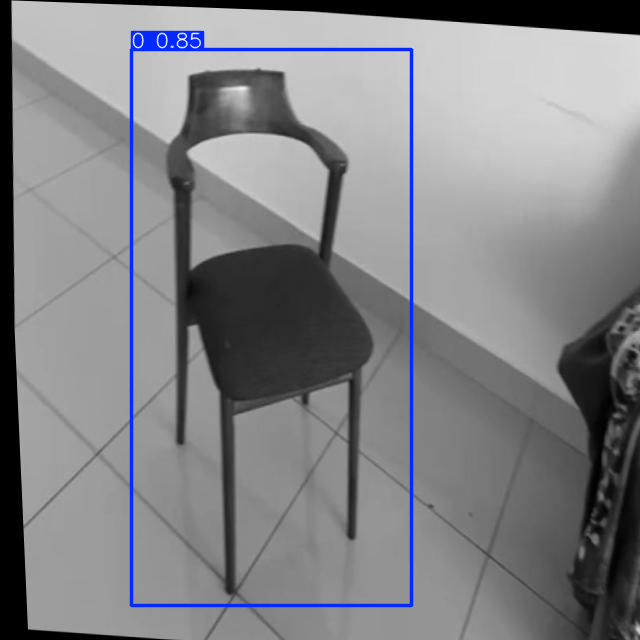

In [10]:
# 학습된 모델 파일 경로 (.pt)
model = YOLO("/content/runs/detect/yolov8_chair/weights/best.pt")

# 예측할 이미지 경로
img_path = "/content/chair_dataset/valid/images/out53_png.rf.579718b59e5fd9bbdeb04839941526f0.jpg"

# 추론 수행
results = model.predict(source=img_path, conf=0.3)

# 결과 시각화
results[0].show()

In [12]:
print("클래스 번호:", results[0].boxes.cls)
print("신뢰도:", results[0].boxes.conf)


클래스 번호: tensor([0.], device='cuda:0')
신뢰도: tensor([0.8522], device='cuda:0')


In [15]:
print(model.names)


{0: '0', 1: '1', 2: '2'}


In [11]:
# 예측된 바운딩 박스 정보 출력
for box in results[0].boxes:
    cls = int(box.cls[0])
    conf = float(box.conf[0])
    xyxy = box.xyxy[0].tolist()
    print(f"Class: {model.names[cls]}, Conf: {conf:.2f}, BBox: {xyxy}")


Class: 0, Conf: 0.85, BBox: [131.8151397705078, 49.767578125, 411.49749755859375, 605.2030029296875]


### 5. validation 세트 테스트


image 1/275 /content/chair_dataset/valid/images/07_PNG.rf.ea33319c09e452d2b322085c545b1dea.jpg: 640x640 1 1, 10.6ms
image 2/275 /content/chair_dataset/valid/images/100_png_jpg.rf.07d9021b1abf9c84766f2ed9d8131df2.jpg: 640x640 2 0s, 7.4ms
image 3/275 /content/chair_dataset/valid/images/100_png_jpg.rf.102c28416f286bd1fa6f43867b3d277f.jpg: 640x640 2 0s, 7.3ms
image 4/275 /content/chair_dataset/valid/images/104_png_jpg.rf.4e9057e5392606428bd79f09812c0ba4.jpg: 640x640 2 0s, 7.3ms
image 5/275 /content/chair_dataset/valid/images/105_png_jpg.rf.49933bd29c746aae242dd5514f3136b5.jpg: 640x640 1 0, 8.3ms
image 6/275 /content/chair_dataset/valid/images/105_png_jpg.rf.81f7fb1fef3c29c0b10bc3beb70d69b7.jpg: 640x640 1 0, 7.4ms
image 7/275 /content/chair_dataset/valid/images/105_png_jpg.rf.930704782f26b8934c4e5feaa26450a5.jpg: 640x640 1 0, 7.4ms
image 8/275 /content/chair_dataset/valid/images/109_png_jpg.rf.3214cb9aed91669b26e1660805157820.jpg: 640x640 1 0, 7.3ms
image 9/275 /content/chair_dataset/valid

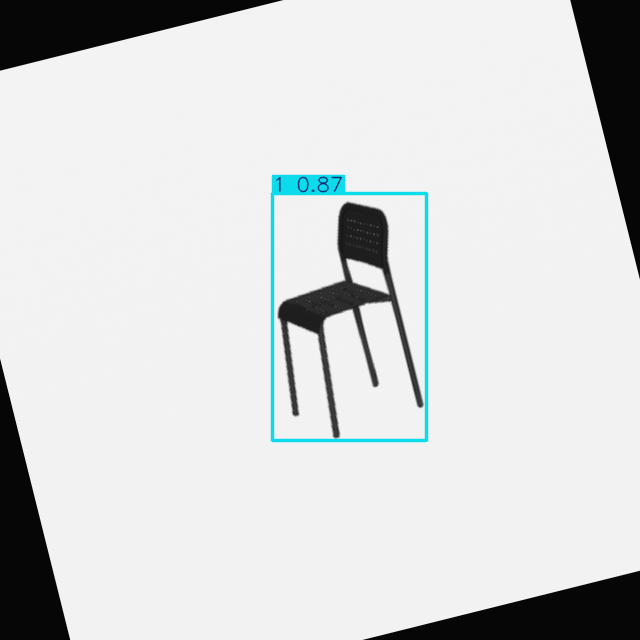

In [13]:
# 검출 실행 (validation 이미지 대상)
val_images_path = os.path.join(extract_path, "valid", "images")

results = model.predict(
    source=val_images_path,
    conf=0.3,
    save=True
)

# 시각화 결과 보기
results[0].show()


In [14]:
# 학습된 모델 저장 (ONNX 예시)
model.export(format="onnx")

Ultralytics 8.3.165 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.00GHz)
💡 ProTip: Export to OpenVINO format for best performance on Intel hardware. Learn more at https://docs.ultralytics.com/integrations/openvino/

PyTorch: starting from '/content/runs/detect/yolov8_chair/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 7, 8400) (6.0 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0,<1.18.0', 'onnxslim>=0.1.59', 'onnxruntime-gpu'] not found, attempting AutoUpdate...

requirements: AutoUpdate success ✅ 6.2s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.59...
ONNX: export success ✅ 7.6s, saved as '/content/runs/detect/yolov8_chair/weights/best.onnx' (11.7 MB)

Export complete (8.0s)
Results saved to /content/runs/detect/yolov8_chair/weights
Predict:         yolo predict task=detect model=/content/runs/detect/yolov8_cha

'/content/runs/detect/yolov8_chair/weights/best.onnx'